In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.callbacks import ModelCheckpoint

In [24]:
DIRECTORY = 'New folder'
CATEGORIES = ['mask_weared_incorrect','with_mask','without_mask']

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(128, 128))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)

In [14]:
classes = ['mask weared incorrect','with mask','without mask']

In [3]:
labels = np.array(labels)
print(labels.shape)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

data = np.array(data)/255.0

(148,)


In [4]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.20, stratify=labels, random_state=42)

In [5]:
trainY

array([0, 2, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 1, 2,
       0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2,
       1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0,
       1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [6]:
ann = models.Sequential([
    layers.Flatten(input_shape=(128,128,3)),
    layers.Dense(100,activation='relu'),
    layers.Dense(50,activation='relu'),
    layers.Dense(3,activation='softmax'),

])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [10]:
checkpoint_1 = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history_1 = ann.fit(trainX,trainY,epochs=20,callbacks=[checkpoint_1],validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 1s 240ms/step - loss: 1.0982 - accuracy: 0.4149 - val_loss: 1.0984 - val_accuracy: 0.3750
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
3/3 [==============================] - 0s 66ms/step - loss: 1.0982 - accuracy: 0.4255 - val_loss: 1.0983 - val_accuracy: 0.2917
INFO:tensorflow:Assets written to: model-002.model\assets
Epoch 3/20
3/3 [==============================] - 0s 66ms/step - loss: 1.0976 - accuracy: 0.4149 - val_loss: 1.0983 - val_accuracy: 0.2917
Epoch 4/20
3/3 [==============================] - 0s 88ms/step - loss: 1.0972 - accuracy: 0.3723 - val_loss: 1.0983 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
3/3 [==============================] - 0s 71ms/step - loss: 1.0971 - accuracy: 0.3723 - val_loss: 1.0984 - val_accuracy: 0.2500
Epoch 6/20
3/3 [==============================] - 0s 89ms/step - loss: 1.0969 - accuracy: 0.3830 - val_loss: 1.0985 - val_accuracy

In [12]:
ann.evaluate(testX , testY)

1/1 [==============================] - 0s 89ms/step - loss: 1.0947 - accuracy: 0.3333


[1.0947437286376953, 0.3333333432674408]

In [11]:
y_pred_1 = ann.predict(testX)
y_pred_label_1 = [np.argmax(i) for i in y_pred_1]
y_pred_label_1[4]

2

In [18]:
classes[y_pred_label_1[4]]

'without mask'

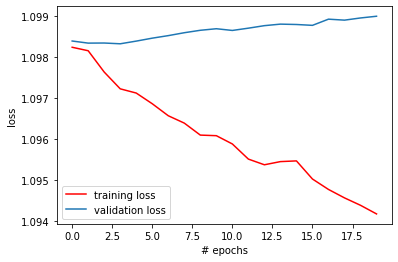

In [21]:
from matplotlib import pyplot as plt

plt.plot(history_1.history['loss'],'r',label='training loss')
plt.plot(history_1.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

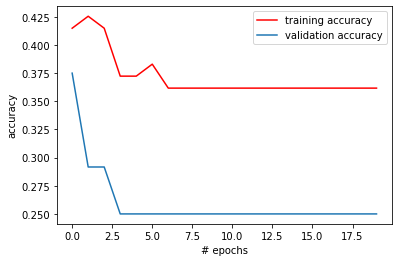

In [25]:
plt.plot(history_1.history['accuracy'],'r',label='training accuracy')
plt.plot(history_1.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()